<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [3]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [4]:
from torchvision import datasets 
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [7]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [8]:
label_map = {0: 0, 2: 1} #first label maps to first and second label changes to first
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]] #only b/w 0 and 1 

cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [9]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

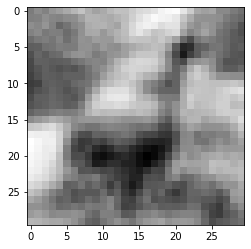

In [10]:
plt.imshow(output[0, 0].detach(), cmap='gray') #input
plt.show()

In [11]:
img.shape

torch.Size([3, 32, 32])

In [12]:
img[0]

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
        [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
        [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
        ...,
        [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
        [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
        [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]])

In [13]:
img.unsqueeze(0)

tensor([[[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
          [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
          [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
          ...,
          [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
          [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
          [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],

         [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
          [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
          [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
          ...,
          [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
          [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
          [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],

         [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
          [-0.4487, -0.9734, -

In [14]:
img.unsqueeze(0).shape

torch.Size([1, 3, 32, 32])

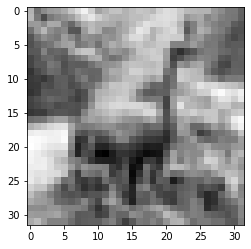

In [15]:
plt.imshow(img.mean(0), cmap='gray') #output #mean is calculated along the zeroTH dimension
plt.show()

In [16]:
img[0].mean()

tensor(-0.0762)

In [17]:
img

tensor([[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
         [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
         [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
         ...,
         [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
         [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
         [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],

        [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
         [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
         [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
         ...,
         [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
         [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
         [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],

        [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
         [-0.4487, -0.9734, -1.0634,  ..., -0

In [18]:
img.mean(0)

tensor([[ 0.5007, -0.2808,  0.0308,  ..., -0.1621, -0.1873, -0.4339],
        [ 0.5542, -0.1752, -0.7118,  ..., -0.1801, -0.2151, -0.4552],
        [ 0.1982,  0.2245,  0.0067,  ..., -0.1765, -0.5143, -0.6178],
        ...,
        [ 0.0420,  0.0605,  0.0189,  ..., -0.5626, -0.4651, -0.0363],
        [ 0.2374,  0.2070,  0.2100,  ..., -0.6502, -0.4448, -0.0253],
        [ 0.4067,  0.5953,  0.2486,  ..., -0.5311, -0.5673, -0.1147]])

In [19]:
img.shape

torch.Size([3, 32, 32])

In [20]:
img.mean(0).shape

torch.Size([32, 32])

In [21]:
a = torch.randn(32, 32)
a

tensor([[ 0.5872,  0.6438,  0.0149,  ...,  0.7953, -0.0454, -1.4924],
        [-0.9550, -1.4499,  0.6208,  ..., -0.9321, -0.2369,  0.3637],
        [-0.4644, -0.2742, -1.1834,  ...,  1.2787,  0.8670, -0.2423],
        ...,
        [ 2.0462, -0.9298,  0.5963,  ...,  2.4366,  0.2933, -1.2419],
        [ 0.2757, -0.7379,  0.5973,  ..., -1.4982, -0.4778,  0.2966],
        [ 2.8514,  1.0087, -1.6974,  ...,  0.0440,  0.1958, -0.7291]])

In [22]:
b = a.mean(0)
b

tensor([ 0.0075,  0.1487, -0.0840,  0.0419, -0.1350, -0.0440, -0.1626,  0.1390,
        -0.0020,  0.2247, -0.0704,  0.0138,  0.0884,  0.0698, -0.1007, -0.0554,
        -0.2284, -0.1491, -0.1250,  0.2320, -0.0563, -0.0536, -0.1872,  0.1262,
        -0.0526,  0.0879, -0.0168, -0.2301,  0.0838, -0.1341, -0.0201, -0.0856])

In [23]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [24]:
with torch.no_grad():
  conv.bias.zero_()

with torch.no_grad():
  conv.weight.fill_(1.0 / 9.0)

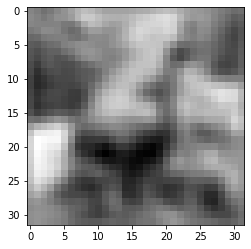

In [25]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [26]:
output.shape

torch.Size([1, 1, 32, 32])

In [27]:
output[0, 0].shape

torch.Size([32, 32])

In [28]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
  conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                 [-1.0, 0.0, 1.0],
                                 [-1.0, 0.0, 1.0]])
  conv.bias.zero_()

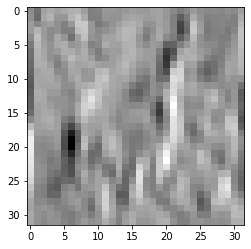

In [29]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [30]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [31]:
model= nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    #...
    nn.Linear(8*8*8,32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [32]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [33]:
model(img.unsqueeze(0)) #intended error
#whats missing? reshaping 8x8 image to 512 element

RuntimeError: ignored

In [34]:
class Net (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8*8*8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32, 2)

  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = out.view(-1, 8*8*8) # THIS IS (#...)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out 

In [35]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [36]:
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(8*8*8, 32)
    self.fc2 = nn.Linear(32, 2)

  def forward(self, x):
    out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
    out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
    out = out.view(-1, 8*8*8)
    out = torch.tanh(self.fc1(out))
    out = self.fc2(out)
    return out

In [37]:
model = Net()
model(img.unsqueeze(0)) #unsqueeze adds an extra dimension

tensor([[ 0.0969, -0.0192]], grad_fn=<AddmmBackward>)

In [38]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    for imgs, labels in train_loader:
      outputs = model(imgs)
      loss = loss_fn(outputs , labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()

    if epoch == 1 or epoch % 10 == 0:
      print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [39]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100,
              optimizer = optimizer,
              model = model,
              loss_fn = loss_fn,
              train_loader = train_loader)

2021-08-21 12:51:36.075897 Epoch 1, Training loss 0.5721478507776928
2021-08-21 12:52:11.272774 Epoch 10, Training loss 0.3266723064859961
2021-08-21 12:52:50.391728 Epoch 20, Training loss 0.2923283021730982
2021-08-21 12:53:29.559003 Epoch 30, Training loss 0.2660620756399859
2021-08-21 12:54:08.464857 Epoch 40, Training loss 0.24664446502734141
2021-08-21 12:54:47.858252 Epoch 50, Training loss 0.2285005370048201
2021-08-21 12:55:28.027946 Epoch 60, Training loss 0.21302281846855856
2021-08-21 12:56:07.498939 Epoch 70, Training loss 0.19720631999195
2021-08-21 12:56:46.437571 Epoch 80, Training loss 0.18580445618766128
2021-08-21 12:57:25.488395 Epoch 90, Training loss 0.1717143097690716
2021-08-21 12:58:04.276854 Epoch 100, Training loss 0.15813261405772464


In [44]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
  for name, loader in [("train", train_loader), ("val", val_loader)]:
    correct = 0
    total = 0

    with torch.no_grad():
      for imgs, labels in loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

    print("Accuracy {}: {:.2f}".format(name, correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.89


In [ ]:
244

In [48]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [50]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [59]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}")

Training on device cuda


In [63]:
import datetime 

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
  
    for imgs, labels in train_loader:
      imgs = imgs.to(device=device)
      labels = labels.to(device=device)
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()

    if epoch ==1 or epoch% 10 == 0:
      print('{} Epoch {}, Training loss{}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [64]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100,
              optimizer = optimizer,
              model = model,
              loss_fn = loss_fn,
              train_loader = train_loader)

2021-08-21 14:06:23.975301 Epoch 1, Training loss0.5489234212477496
2021-08-21 14:06:30.236169 Epoch 10, Training loss0.3242151649894228
2021-08-21 14:06:37.279570 Epoch 20, Training loss0.2908726182712871
2021-08-21 14:06:44.276124 Epoch 30, Training loss0.2673464961302508
2021-08-21 14:06:51.211125 Epoch 40, Training loss0.24715062899954
2021-08-21 14:06:58.164989 Epoch 50, Training loss0.23600116168047972
2021-08-21 14:07:05.180154 Epoch 60, Training loss0.2167576875561362
2021-08-21 14:07:12.194818 Epoch 70, Training loss0.20516059576136292
2021-08-21 14:07:19.230323 Epoch 80, Training loss0.19126741175249123
2021-08-21 14:07:26.244026 Epoch 90, Training loss0.17804870066369416
2021-08-21 14:07:33.231111 Epoch 100, Training loss0.16360055422706968


In [65]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt', map_location=device))

<All keys matched successfully>